# Solution 06 SKLEARN // Fabby 

### === Task 1 ===

1. Load the sklearn breast cancer dataset.  Perform SVC with cross-validation of leaveOneOut.

In [1]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

from sklearn.svm import SVC
model = SVC()

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
print("CV scores mean : ", scores.mean())

CV scores mean :  0.9121265377855887


### === Task 2 ===

1. Load the sklearn boston dataset.  Extract the RAD feature as your single feature for your X with the normal y.   Using a validation curve to test different polynomials and identify the optimal polynomial order for the regression.  

In [3]:
import numpy as np
from sklearn.datasets import load_boston
data = load_boston()

print(data.feature_names)

X = data.data
y = (data.target)
y = y.reshape(-1,1)

X = X[:,8].reshape(-1,1)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Text(0, 0.5, 'score')

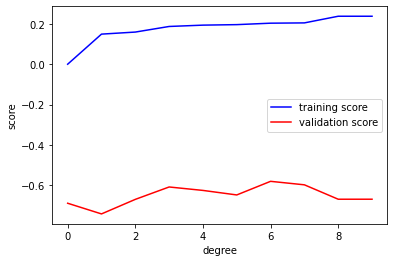

In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

from sklearn.model_selection import validation_curve
degree = np.arange(0, 10)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree', param_range= degree, cv=10)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('degree')
plt.ylabel('score')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = PolynomialRegression(3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2_score : ", r2_score(y_test, y_pred))

MSE :  80.00066185212054
r2_score :  0.1923895152076065


### === Task 3 ===

1. Load the sklearn boston dataset.  Extract the RAD feature as your single feature for your X with the normal y.   Using a learning curve to test polynomial of 2 and 9.  Check whether you found the same phenemonon as above.  How much sample is enough for 2 and 9?

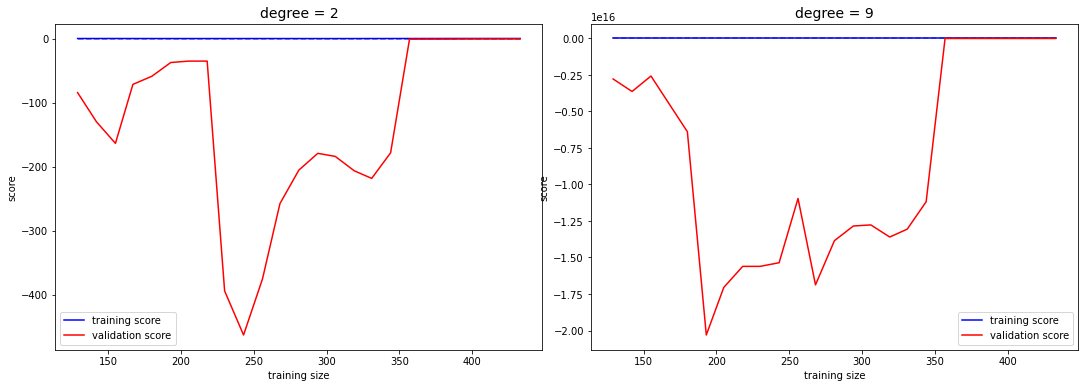

In [6]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')
    
# 350 samples should be enough for both 2 and 9 degree

### === Task 4 ===

1. Load the sklearn boston dataset.  Extract the RAD feature as your single feature for your X with the normal y.   Use the grid search to identify the best polynomial order to use for prediction.  Then perform the prediction using the <code>grid_best_estimator_</code>

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(10),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [8]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [9]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 3}

In [10]:
model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2_score : ", r2_score(y_test, y_pred))

MSE :  80.0006618521136
r2_score :  0.19238951520767666
